<a href="https://colab.research.google.com/github/adwait-hegde/DataAnalytics-Lab/blob/main/Exp1/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
 

## Mounting to google drive to get the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
drive.mount("MyDrive")
os.chdir("MyDrive")
os.chdir("MyDrive")
os.listdir()

# Importing the dataset

In [ ]:
df = pd.read_csv('csv/crime.csv', sep=',', encoding='latin-1')

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [ ]:
df.shape

(70894, 17)

In [ ]:
df.describe()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long
count,70894.000000,0.0,70894.000000,70894.0,70894.000000,70894.000000,0.0,70894.000000,7.089400e+04
mean,2292.077200,NaN,0.015826,2020.0,6.595678,12.815979,NaN,41.278263,-6.933145e+01
std,1257.571021,NaN,0.124805,0.0,3.452960,6.438212,NaN,6.563217,1.102357e+01
min,111.000000,NaN,0.000000,2020.0,1.000000,0.000000,NaN,0.000000,-7.117867e+01
25%,801.000000,NaN,0.000000,2020.0,3.000000,9.000000,NaN,42.295129,-7.109835e+01
50%,3005.000000,NaN,0.000000,2020.0,7.000000,14.000000,NaN,42.325303,-7.107671e+01
75%,3125.000000,NaN,0.000000,2020.0,10.000000,18.000000,NaN,42.346735,-7.105976e+01
max,99999.000000,NaN,1.000000,2020.0,12.000000,23.000000,NaN,42.395042,5.249691e-08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70894 entries, 0 to 70893
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      70894 non-null  object 
 1   OFFENSE_CODE         70894 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  70894 non-null  object 
 4   DISTRICT             70616 non-null  object 
 5   REPORTING_AREA       70894 non-null  object 
 6   SHOOTING             70894 non-null  int64  
 7   OCCURRED_ON_DATE     70894 non-null  object 
 8   YEAR                 70894 non-null  int64  
 9   MONTH                70894 non-null  int64  
 10  DAY_OF_WEEK          70894 non-null  object 
 11  HOUR                 70894 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               70893 non-null  object 
 14  Lat                  70894 non-null  float64
 15  Long                 70894 non-null 

# Droping unwanted columns

In [ ]:
df = df.drop(['OFFENSE_CODE_GROUP','UCR_PART', 'INCIDENT_NUMBER', 'Location'], axis = 1)

In [ ]:
df.isna().sum()

OFFENSE_CODE             0
OFFENSE_DESCRIPTION      0
DISTRICT               278
REPORTING_AREA           0
SHOOTING                 0
OCCURRED_ON_DATE         0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
HOUR                     0
STREET                   1
Lat                      0
Long                     0
dtype: int64

In [ ]:
df["STREET"].fillna("Unknown", inplace = True)

# VISUALIZING THE DATA

## Histplots

DAY OF WEEK

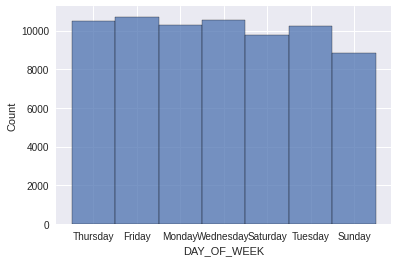

In [ ]:
sns.histplot(x='DAY_OF_WEEK', data=df, )
plt.show()

HOUR

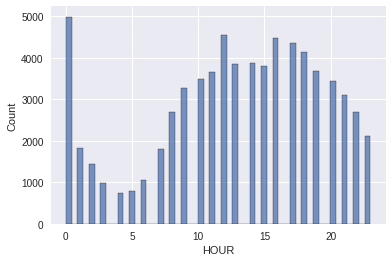

In [ ]:
sns.histplot(x='HOUR', data=df, )
plt.show()

MONTH

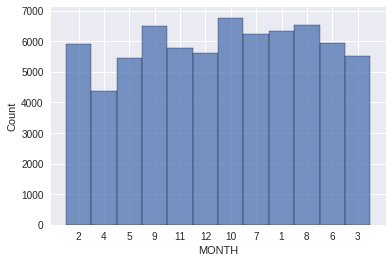

In [ ]:
sns.histplot(x='MONTH', data=df, )
plt.show()

SHOOTING

 SHOOTING CASES: 1122


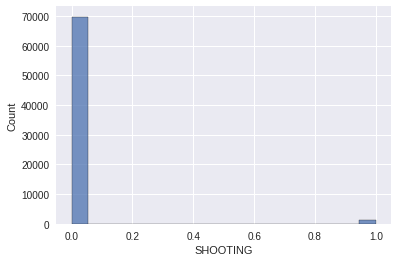

In [ ]:
print(' SHOOTING CASES:', df.loc[df['SHOOTING']==1]['SHOOTING'].count())
sns.histplot(x='SHOOTING', data=df, )
plt.show()

## Plotting data only where there was shooting

---



Month

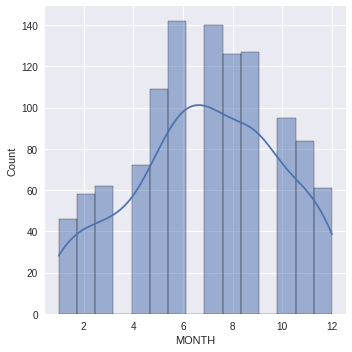

In [ ]:
temp_df = df
temp_df = df.loc[df['SHOOTING']==1]
sns.displot(x='MONTH', data=temp_df, kde=True )
plt.show()

Hour

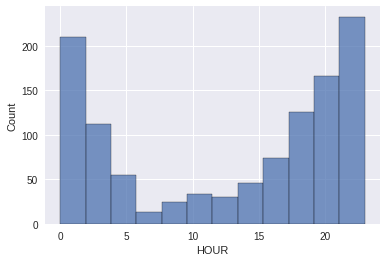

In [ ]:
temp_df = df
temp_df = df.loc[df['SHOOTING']==1]
sns.histplot(x='HOUR', data=temp_df )
plt.show()

Shooting 

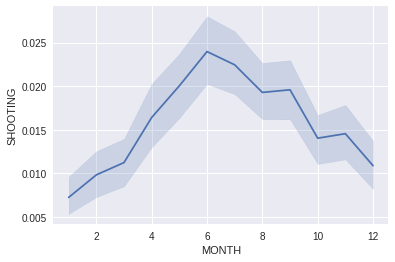

In [48]:
temp_df =df
temp_df['MONTH'] = df['MONTH'].map(int)
sns.lineplot(data=temp_df, x="MONTH", y="SHOOTING")

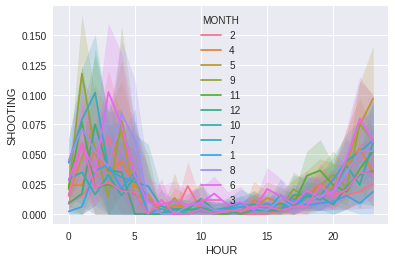

In [ ]:
temp_df =df
temp_df['MONTH'] = df['MONTH'].map(str)
sns.lineplot(data=temp_df, x="HOUR", y="SHOOTING", hue="MONTH")

# Scatter Plot

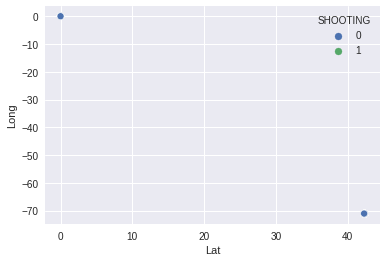

In [ ]:
sns.scatterplot(data=df, x='Lat', y='Long', hue="SHOOTING")

## Handling the inaccurate data

In [ ]:
print(' Invalid Longitudes:', df.loc[df['Long']>-1]['Long'].count())
print(' Invalid Latitudes:', df.loc[df['Lat']<1]['Lat'].count())

 Invalid Longitudes: 1748
 Invalid Latitudes: 1748


In [ ]:
df.loc[df["Long"] > -15 , "Long"] = float("nan")
df.loc[df["Lat"] < 15 , "Lat"] = float("nan")

In [ ]:
df["Long"].fillna(df["Long"].mean(), inplace=True)
df["Lat"].fillna(df["Lat"].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70894 entries, 0 to 70893
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OFFENSE_CODE         70894 non-null  int64  
 1   OFFENSE_DESCRIPTION  70894 non-null  object 
 2   DISTRICT             70616 non-null  object 
 3   REPORTING_AREA       70894 non-null  object 
 4   SHOOTING             70894 non-null  int64  
 5   OCCURRED_ON_DATE     70894 non-null  object 
 6   YEAR                 70894 non-null  int64  
 7   MONTH                70894 non-null  int64  
 8   DAY_OF_WEEK          70894 non-null  object 
 9   HOUR                 70894 non-null  int64  
 10  STREET               70894 non-null  object 
 11  Lat                  70894 non-null  float64
 12  Long                 70894 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 7.0+ MB


In [ ]:
df.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Lat,Long
count,70894.000000,70894.000000,70894.0,70894.000000,70894.000000,70894.000000,70894.000000
mean,2292.077200,0.015826,2020.0,6.595678,12.815979,42.321771,-71.084139
std,1257.571021,0.124805,0.0,3.452960,6.438212,0.031796,0.030777
min,111.000000,0.000000,2020.0,1.000000,0.000000,42.232656,-71.178674
25%,801.000000,0.000000,2020.0,3.000000,9.000000,42.297555,-71.098349
50%,3005.000000,0.000000,2020.0,7.000000,14.000000,42.325303,-71.078711
75%,3125.000000,0.000000,2020.0,10.000000,18.000000,42.346735,-71.061340
max,99999.000000,1.000000,2020.0,12.000000,23.000000,42.395042,-70.953726


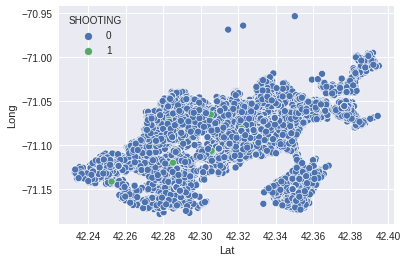

In [ ]:
sns.scatterplot(data=df, x='Lat', y='Long', hue="SHOOTING")

## Correlation Matrix 

          SHOOTING     MONTH      HOUR       Lat      Long
SHOOTING  1.000000  0.012099  0.001904 -0.059964  0.005325
MONTH     0.012099  1.000000 -0.001235 -0.000373  0.000708
HOUR      0.001904 -0.001235  1.000000 -0.019083 -0.015260
Lat      -0.059964 -0.000373 -0.019083  1.000000  0.389966
Long      0.005325  0.000708 -0.015260  0.389966  1.000000


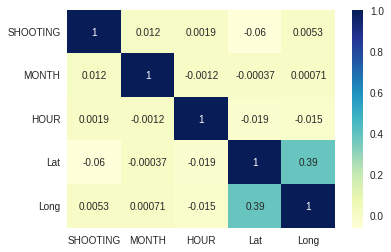

In [ ]:
temp_df = df[['SHOOTING','MONTH','HOUR','DAY_OF_WEEK','REPORTING_AREA','Lat','Long']]
print(temp_df.corr())
  
# plotting correlation heatmap
dfplot = sns.heatmap(temp_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

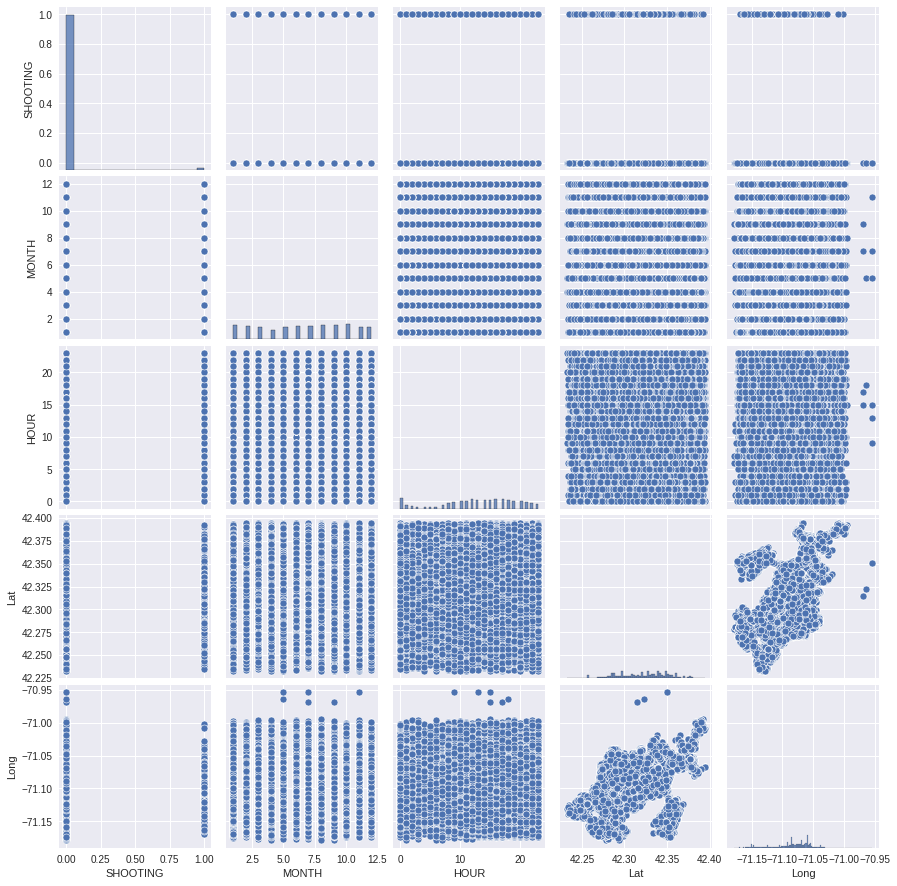

In [ ]:
sns.pairplot(df[['SHOOTING','MONTH','HOUR','DAY_OF_WEEK','REPORTING_AREA','Lat','Long']])
plt.show()

Dataset: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/be047094-85fe-4104-a480-4fa3d03f9623